In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [288]:
data = pd.read_csv('day.csv')

In [289]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


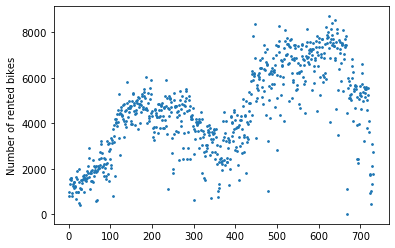

In [291]:
plt.scatter(data['instant'], data['cnt'], s= 3)
plt.ylabel('Number of rented bikes')
plt.show()

In [292]:
y = data['cnt']
df = data.drop(['casual', 'registered','dteday', 'cnt'], axis = 1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [293]:
X_tr, X_te, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 123)
X_train = X_tr.drop(['instant'], axis = 1)
X_test = X_te.drop(['instant'], axis = 1)

In [294]:
model = RandomForestRegressor(criterion = 'mae', max_depth = 15)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

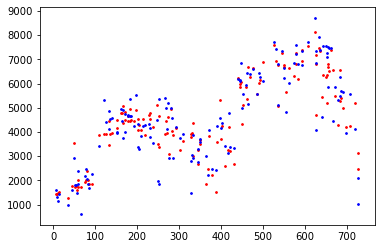

Mean abs test error: 507.375306122449
Mean abs train error: 177.43539383561642


In [295]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
plt.scatter(X_te['instant'], y_pred, s = 3, c = 'red')
plt.scatter(X_te['instant'], y_test, s = 3, c = 'blue')
plt.show()
print('Mean abs test error:', mean_absolute_error(y_test, y_pred))
print('Mean abs train error:', mean_absolute_error(y_train, y_pred_train))

In [296]:
import umap
import shap

In [297]:
explainer = shap.TreeExplainer(model)
shap_vals = explainer.shap_values(X_train)

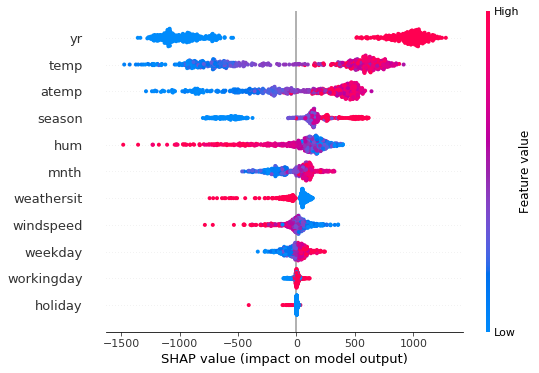

In [298]:
shap.summary_plot(shap_vals, X_train)

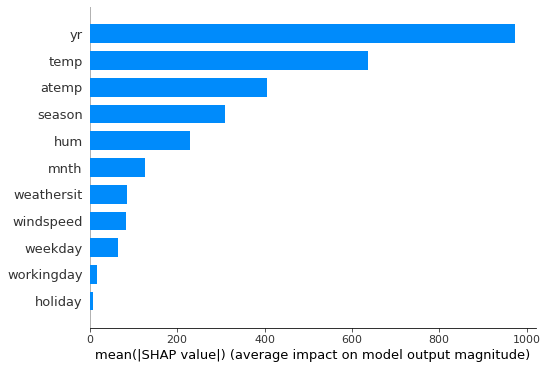

In [299]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")

In [300]:
# Exclude the first year
df = df.loc[df['yr']== 1]
y = y[list(data['yr']).count(0):]
df.drop(['yr', 'holiday'], axis = 1, inplace = True)
# sine cosine encoding will not help a tree based model learn, use one hot encoding instead

seasons = pd.get_dummies(df.season, prefix='season')
months = pd.get_dummies(df.mnth, prefix = 'month')

In [301]:
df = df.join(seasons)
df = df.join(months)
df.drop(['season'], axis = 1, inplace = True)
df.head()

,instant,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,season_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
365,366,1,0,0,1,0.370000,0.375621,0.692500,0.192167,1,...,0,0,0,0,0,0,0,0,0,0
366,367,1,1,0,1,0.273043,0.252304,0.381304,0.329665,1,...,0,0,0,0,0,0,0,0,0,0
367,368,1,2,1,1,0.150000,0.126275,0.441250,0.365671,1,...,0,0,0,0,0,0,0,0,0,0
368,369,1,3,1,2,0.107500,0.119337,0.414583,0.184700,1,...,0,0,0,0,0,0,0,0,0,0
369,370,1,4,1,1,0.265833,0.278412,0.524167,0.129987,1,...,0,0,0,0,0,0,0,0,0,0


In [302]:
X_tr, X_te, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 123)
X_train = X_tr.drop(['instant'], axis = 1)
X_test = X_te.drop(['instant'], axis = 1)

In [303]:
model = RandomForestRegressor(criterion = 'mae', max_depth = 10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

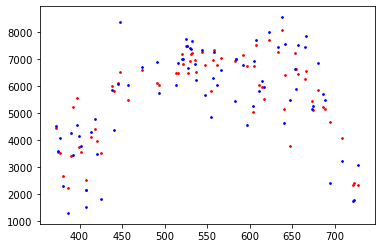

Mean abs test error: 603.6325
Mean abs train error: 236.54369863013696


In [304]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
plt.scatter(X_te['instant'], y_pred, s = 3, c = 'red')
plt.scatter(X_te['instant'], y_test, s = 3, c = 'blue')
plt.show()
print('Mean abs test error:', mean_absolute_error(y_test, y_pred))
print('Mean abs train error:', mean_absolute_error(y_train, y_pred_train))

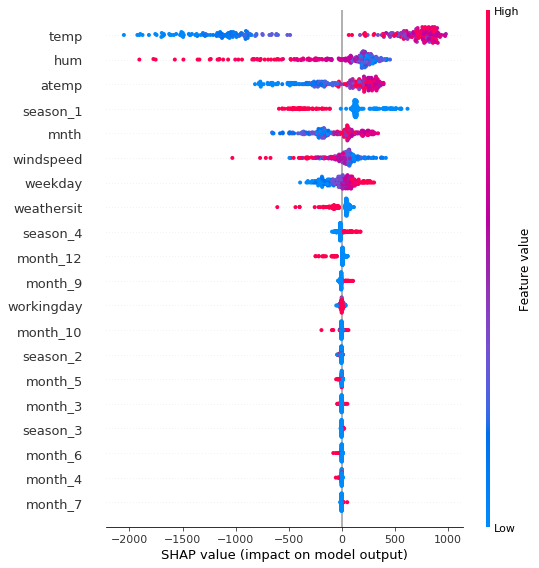

In [305]:
explainer = shap.TreeExplainer(model)
shap_vals = explainer.shap_values(X_train)
shap.summary_plot(shap_vals, X_train)